In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
#import pandas_datareader.data as web
style.use('ggplot')

df = pd.read_csv('TSLA.csv', parse_dates=True, index_col=0)

In [3]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [4]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()

In [5]:
df_volume = df['Volume'].resample('10D').sum()

In [6]:
print(df_ohlc.head())

                  open        high         low       close
Date                                                      
2018-09-21  299.100006  309.579987  264.769989  264.769989
2018-10-01  310.700012  310.700012  250.559998  256.880005
2018-10-11  252.229996  276.589996  252.229996  260.000000
2018-10-21  260.950012  334.850006  260.950012  329.899994
2018-10-31  337.320007  351.399994  337.320007  350.510010


In [7]:
df_ohlc = df_ohlc.reset_index()

In [8]:
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

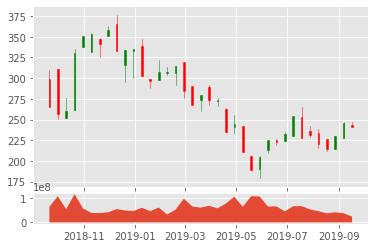

In [13]:
fig = plt.figure()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)
plt.show()